In [1]:
##importing relevant packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
##importing clean data
df = pd.read_csv("https://raw.githubusercontent.com/Ali-Duni/project_coding/refs/heads/main/data/clean/WDI_regions_cleaned.csv")
df.head()

,Unnamed: 0,child_mortality_rate,immunization_rate,region,Time
0,240,56.8,89.442535,East Asia & Pacific,1990
1,242,54.8,75.933932,Latin America & Caribbean,1990
2,243,65.4,83.168504,Middle East & North Africa,1990
3,244,129.4,55.975660,South Asia,1990
4,245,180.5,57.269665,Sub-Saharan Africa,1990


In [3]:
##first, I will make a list of regions in our dataframe
regions = df["region"].unique().tolist()
regions

['East Asia & Pacific',
 'Latin America & Caribbean',
 'Middle East & North Africa',
 'South Asia',
 'Sub-Saharan Africa',
 'North America',
 'World',
 'Europe & Central Asia']

In [4]:
##adding a column/variable into the dataframe which denotes the decade
df["decade"] = (df['Time'] // 10) * 10 
df.head()

,Unnamed: 0,child_mortality_rate,immunization_rate,region,Time,decade
0,240,56.8,89.442535,East Asia & Pacific,1990,1990
1,242,54.8,75.933932,Latin America & Caribbean,1990,1990
2,243,65.4,83.168504,Middle East & North Africa,1990,1990
3,244,129.4,55.975660,South Asia,1990,1990
4,245,180.5,57.269665,Sub-Saharan Africa,1990,1990


In [5]:
##let us see the mean immunization rate and child mortality for each region by decades 
mean_region_decade = df.groupby(["region", "decade"])[["child_mortality_rate", "immunization_rate"]].mean().T
mean_region_decade

region               East Asia & Pacific                        \
decade                              1990       2000       2010   
child_mortality_rate           49.770000  30.910000  18.550000   
immunization_rate              82.456787  87.389001  93.331439   

region               Europe & Central Asia                        \
decade                                1990       2000       2010   
child_mortality_rate             26.737500  16.930000  10.675000   
immunization_rate                85.359954  92.571905  94.147404   

region               Latin America & Caribbean                        \
decade                                    1990       2000       2010   
child_mortality_rate                 44.540000  26.730000  19.575000   
immunization_rate                    84.594213  93.930246  93.023113   

region               Middle East & North Africa  ... North America  \
decade                                     1990  ...          2010   
child_mortality_rate                  54.530000  ...      6.812500   
immunization_rate                     86.054058  ...     91.764444   

region                South Asia                       Sub-Saharan Africa  \
decade                      1990       2000       2010               1990   
child_mortality_rate  113.440000  79.060000  53.275000         171.620000   
immunization_rate      58.361153  66.009931  82.657769          53.391225   

region                                           World                        
decade                      2000       2010       1990       2000       2010  
child_mortality_rate  129.270000  87.175000  87.170000  65.100000  44.737500  
immunization_rate      60.296365  70.056666  71.768721  76.880264  84.524644  

[2 rows x 24 columns]

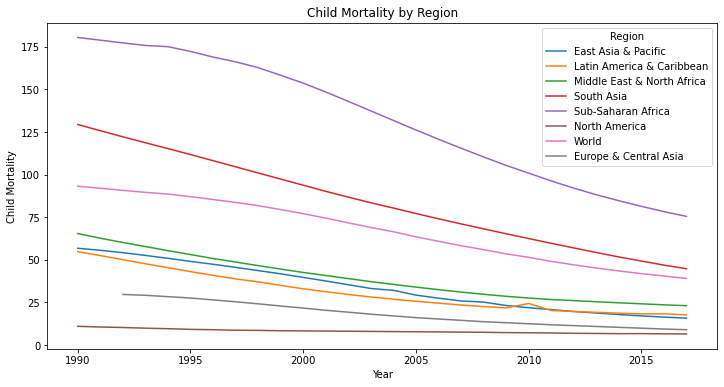

In [9]:
##finally, I want to create two plots that will show child mortality rates and immunization rates for each region for each years
##I will use the functional approach
##figure for Child Mortality
plt.figure(figsize=(12, 6))
for i in regions:
    region_data = df[df["region"] == i]
    plt.plot(region_data["Time"], region_data["child_mortality_rate"], label=i)
    
plt.title("Child Mortality by Region")
plt.xlabel("Year")
plt.ylabel("Child Mortality")
plt.legend(title="Region")
plt.savefig("graphs/regions/child_mortality.jpg")
plt.show()

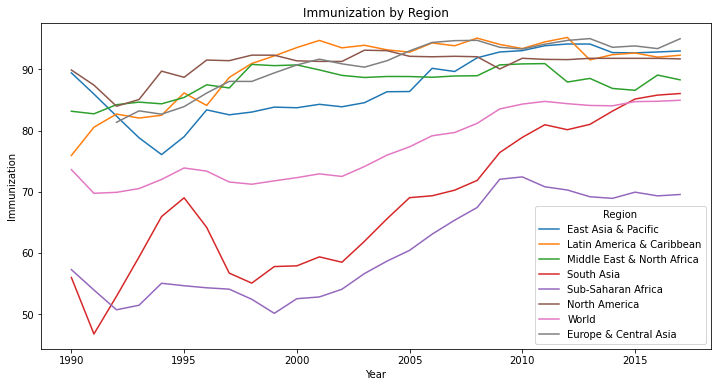

In [11]:
##now, let us see the same for the immunization
plt.figure(figsize=(12, 6))
for i in regions:
    region_data = df[df["region"] == i]
    plt.plot(region_data["Time"], region_data["immunization_rate"], label=i)
    
plt.title("Immunization by Region")
plt.xlabel("Year")
plt.ylabel("Immunization")
plt.legend(title="Region")
plt.savefig("graphs/regions/immunization.jpg")
plt.show()